In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pycaret -q

#### TODO's e Dúvidas

- Precisa separar treino e teste como sempre fazemos? Ou não, pois já tem 2 arquivos separados
- Testar se dados já estão normalizados, mas perguntar tb
- Ver variáveis que não são relevantes 


In [2]:
teste = pd.read_excel('teste.xlsx')
teste.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,1.037165,-0.064713,-0.568709,0.206423,-0.096319,-0.605072,0.055348,-0.131739,0.371072,...,-0.117455,-0.549680,0.251234,0.084659,0.032844,-0.153479,-0.161900,0.051674,-0.146485,-0.167351
1,2,0.999413,-0.625445,-0.260484,-0.447270,-0.561264,-0.135433,-0.514644,0.025099,-0.054974,...,-0.028290,-0.060495,-0.072014,-0.019791,0.826528,-0.126800,-0.407177,0.358392,0.032858,0.027424
2,3,0.045767,0.502259,-0.111723,-0.217624,0.333774,-0.494176,0.474073,-0.042395,-0.021013,...,-0.113273,-0.276434,-0.443233,-0.090445,0.115143,0.295289,-0.160795,-0.216980,-0.010688,-0.163363
3,4,0.989824,-0.092475,-0.532103,0.060062,-0.107619,-0.324415,-0.043913,-0.017683,0.442919,...,0.338480,-0.752412,0.277020,-0.412178,-0.263633,-0.047919,-0.156259,0.321330,-0.170045,-0.047757
4,5,0.512949,-0.085913,0.601859,0.621950,-0.318286,0.549537,-0.469326,0.284619,0.346332,...,0.695699,-0.064083,-0.040918,0.050274,-0.169468,0.045432,-0.211822,-0.365970,-0.101814,0.049579


In [3]:
treino = pd.read_excel('treino.xlsx')
treino.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
0,1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
1,2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
2,3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
3,4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
4,5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0


In [4]:
teste.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
count,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,...,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000,54898.000000
mean,27449.500000,0.129338,0.009623,0.359355,0.066747,-0.133487,0.005784,-0.072828,0.053851,0.048000,...,-0.149019,0.064110,0.110057,0.064483,0.042211,0.037968,-0.059468,-0.011124,0.003549,-0.024291
std,15847.831876,0.652884,0.540415,0.518510,0.609783,0.491579,0.550567,0.391734,0.313164,0.540543,...,0.581995,0.562088,0.429046,0.430158,0.385574,0.359985,0.379407,0.350674,0.197014,0.186348
min,1.000000,-10.918341,-22.123957,-9.201208,-2.534742,-8.766127,-12.829875,-15.589900,-14.451721,-3.506418,...,-8.090082,-2.097933,-7.792510,-2.034608,-5.889420,-10.378384,-3.728030,-1.805896,-3.674938,-6.712484
25%,13725.250000,-0.345834,-0.263581,0.120212,-0.354770,-0.429732,-0.322370,-0.318074,-0.049793,-0.291314,...,-0.441953,-0.318176,-0.123855,-0.193361,-0.186510,-0.176471,-0.283895,-0.223478,-0.075822,-0.105212
50%,27449.500000,0.494794,0.023224,0.386744,0.067949,-0.163524,-0.105000,-0.054910,0.031792,-0.007970,...,-0.015640,0.028253,0.061438,0.106992,0.051757,0.013652,-0.047213,-0.016369,-0.020597,-0.033558
75%,41173.750000,0.604971,0.328416,0.657904,0.472226,0.086932,0.154755,0.162645,0.139481,0.389946,...,0.264024,0.434215,0.318340,0.386859,0.283165,0.222927,0.169478,0.203846,0.051493,0.040062
max,54898.000000,1.195408,7.710259,1.994073,6.273999,17.290630,3.681800,6.446965,7.941294,4.041830,...,2.183938,2.988132,3.039226,1.569762,2.045384,4.422652,2.423943,1.937149,7.703920,11.004756


In [ ]:
# Gerar pandas profiling report
import pandas_profiling as pp
profile = pp.ProfileReport(treino)
profile


In [ ]:
profile.to_file("treino.html")

In [ ]:
treino.describe()

## Separar Treino e Teste

- Revisar para treinar apenas com o df de treino
- testar sem normalizar

In [7]:
# Separar atributos e variável de destino
X = treino.iloc[:, 1:-1]  # Atributos (colunas V1 a V21)
y = treino["Class"]  # Variável de destino (coluna Class)

# Dividir dados de treinamento em treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

## Padronizar os atributos - Necessário ou já está padronizado?

In [8]:
# Padronizar os atributos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(teste.iloc[:, 1:])  # Aplicar a padronização aos dados de teste

### Regressão Logística

In [9]:
# Treinar e avaliar um modelo de regressão logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_val_logreg = logreg.predict(X_val_scaled)
accuracy_logreg = accuracy_score(y_val, y_pred_val_logreg)


print("Regressão Logística - Resultados de Validação:")
#print(classification_report(y_val, y_pred_val_logreg))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_logreg))
print("Accuracy:", accuracy_logreg)

Regressão Logística - Resultados de Validação:
AUC Score: 0.499926741715709
Accuracy: 0.9972477958010619


In [21]:
#testar validação cruzada com 10 folds
scores = cross_val_score(logreg, X_train_scaled, y_train, cv=100, scoring='roc_auc')
print("AUC médio na validação cruzada com 10 folds:", scores.mean())


AUC médio na validação cruzada com 10 folds: 0.7879335172359043


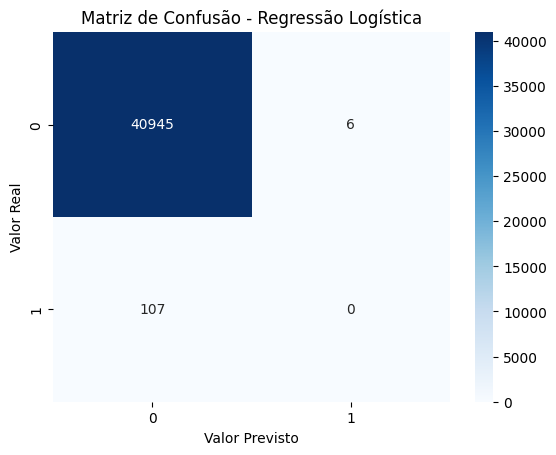

In [22]:
# Plotar a matriz de confusão - Regressão Logística
cm_logreg = confusion_matrix(y_val, y_pred_val_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()

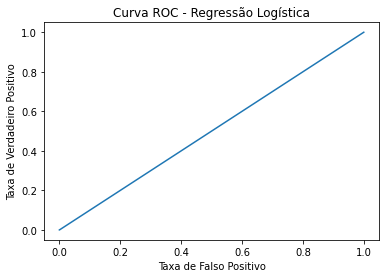

In [12]:
# Plotar a curva ROC - Regressão Logística
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_val, y_pred_val_logreg)
plt.plot(fpr_logreg, tpr_logreg)
plt.title("Curva ROC - Regressão Logística")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

### KNN

In [13]:
# Treinar e avaliar um modelo k-NN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_val_knn = knn.predict(X_val_scaled)
accuracy_knn = accuracy_score(y_val, y_pred_val_knn)

print("k-NN - Resultados de Validação:")
#print(confusion_matrix(y_val, y_pred_val_knn))
#print(classification_report(y_val, y_pred_val_knn))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_knn))
print("Accuracy:", accuracy_knn)

k-NN - Resultados de Validação:
AUC Score: 0.5
Accuracy: 0.9973818004688404


In [14]:
# Fazer previsões no conjunto de teste
y_pred_test = logreg.predict(X_test_scaled)  # Utilize o modelo de regressão logística para prever as classes no conjunto de teste
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

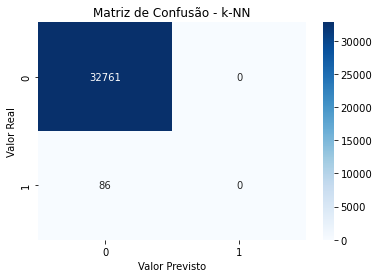

In [15]:
# Plotar a matriz de confusão - k-NN
cm_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - k-NN")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()

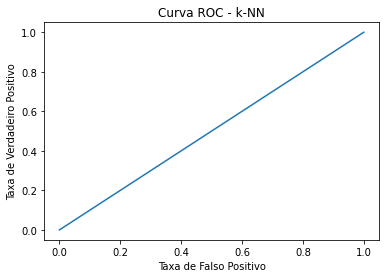

In [16]:
# Plotar a curva ROC - k-NN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, y_pred_val_knn)
plt.plot(fpr_knn, tpr_knn)
plt.title("Curva ROC - k-NN")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

# Fazer previsões no conjunto de teste
y_pred_test = logreg.predict(X_test_scaled)  # Utilize o modelo de regressão logística para prever as classes no conjunto de teste


In [ ]:
output_df = pd.DataFrame({"id": teste["id"], "Class": y_pred_test})
output_df

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Criação do modelo
decision_tree = DecisionTreeClassifier()

# Treinamento do modelo
decision_tree.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_dt = decision_tree.predict(X_val_scaled)

# Avaliação do modelo
accuracy_dt = accuracy_score(y_val, y_pred_val_dt)
print("Árvore de Decisão - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_dt))
print(classification_report(y_val, y_pred_val_dt))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_dt))
print("Accuracy:", accuracy_dt)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criação do modelo
random_forest = RandomForestClassifier()

# Treinamento do modelo
random_forest.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_rf = random_forest.predict(X_val_scaled)

# Avaliação do modelo
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
print("Random Forest - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_rf))
print(classification_report(y_val, y_pred_val_rf))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_rf))
print("Accuracy:", accuracy_rf)


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Criação do modelo
gradient_boosting = GradientBoostingClassifier()

# Treinamento do modelo
gradient_boosting.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_gb = gradient_boosting.predict(X_val_scaled)

# Avaliação do modelo
accuracy_gb = accuracy_score(y_val, y_pred_val_gb)
print("Gradient Boosting - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_gb))
print(classification_report(y_val, y_pred_val_gb))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_gb))
print("Accuracy:", accuracy_gb)


## Support Vector Machines (SVM):

In [ ]:
from sklearn.svm import SVC

# Criação do modelo
svm = SVC()

# Treinamento do modelo
svm.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_svm = svm.predict(X_val_scaled)

# Avaliação do modelo
accuracy_svm = accuracy_score(y_val, y_pred_val_svm)
print("SVM - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_svm))
print(classification_report(y_val, y_pred_val_svm))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_svm))
print("Accuracy:", accuracy_svm)


## Redes Neurais

In [ ]:
from sklearn.neural_network import MLPClassifier

# Criação do modelo
neural_network = MLPClassifier()

# Treinamento do modelo
neural_network.fit(X_train_scaled, y_train)

# Previsões no conjunto de validação
y_pred_val_nn = neural_network.predict(X_val_scaled)

# Avaliação do modelo
accuracy_nn = accuracy_score(y_val, y_pred_val_nn)
print("Redes Neurais - Resultados de Validação:")
print(confusion_matrix(y_val, y_pred_val_nn))
print(classification_report(y_val, y_pred_val_nn))
print("AUC Score:", roc_auc_score(y_val, y_pred_val_nn))
print("Accuracy:", accuracy_nn)


# Hiperparâmetros e validação cruzada


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separar atributos e variável de destino
X = treino.iloc[:, 1:-1]  # Atributos (colunas V1 a V21)
y = treino["Class"]  # Variável de destino (coluna Class)

# Definir os hiperparâmetros que serão testados
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Criar o classificador de Árvore de Decisão
clf = DecisionTreeClassifier()

# Criar o objeto de busca por hiperparâmetros
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Realizar a busca por hiperparâmetros otimizados usando validação cruzada
grid_search.fit(X, y)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Treinar o modelo com os melhores hiperparâmetros encontrados
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X, y)

# Fazer previsões no conjunto de teste
X_test = teste.iloc[:, 1:]
y_pred = best_clf.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y, y_pred)

# Imprimir os melhores hiperparâmetros e a acurácia
print("Melhores hiperparâmetros:", best_params)
#Melhores hiperparâmetros: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}
print("Acurácia:", accuracy)


# Separar atributos e variável de destino para o conjunto de teste
X_test = teste.iloc[:, 1:]  # Atributos (colunas V1 a V21)
y_test = teste["Class"]  # Variável de destino (coluna Class)

# Fazer previsões no conjunto de teste
y_pred = best_clf.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)

# Imprimir os melhores hiperparâmetros e a acurácia
print("Melhores hiperparâmetros:", best_params)
print("Acurácia:", accuracy)

In [ ]:
# Separar atributos e variável de destino para o conjunto de teste
X_test = teste.iloc[:, 1:]  # Atributos (colunas V1 a V21)
y_test = teste["Class"]  # Variável de destino (coluna Class)

# Fazer previsões no conjunto de teste
y_pred = best_clf.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)

# Imprimir os melhores hiperparâmetros e a acurácia
print("Melhores hiperparâmetros:", best_params)
print("Acurácia:", accuracy)

In [ ]:
print("Melhores hiperparâmetros:", best_params)

A acurácia é uma métrica comumente usada para avaliar a qualidade de um modelo de classificação. Ela mede a proporção de previsões corretas em relação ao total de previsões. No entanto, a acurácia nem sempre é a métrica mais confiável, especialmente quando os dados estão desbalanceados, como é o caso do seu conjunto de dados, em que a classe "fraude" é uma parcela pequena da amostra.

Em casos de desbalanceamento de classes, a acurácia pode ser enganosa, pois um modelo pode obter uma alta acurácia simplesmente prevendo a classe majoritária em todos os casos, ignorando completamente a classe minoritária. Isso pode ser problemático quando nosso interesse principal é detectar corretamente as transações fraudulentas.

Para mitigar as falhas da acurácia em cenários de desbalanceamento de classes, é recomendável considerar outras métricas, como:

    Matriz de Confusão: Uma matriz que mostra a contagem de verdadeiros positivos (TP), falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN). Essa matriz fornece uma visão mais detalhada do desempenho do modelo em termos de classificações corretas e incorretas.

    Precisão (Precision): Mede a proporção de verdadeiros positivos em relação ao total de previsões positivas. É uma métrica útil para avaliar o modelo em termos de quantas das previsões positivas são realmente corretas.

    Recall (Sensibilidade ou Revocação): Mede a proporção de verdadeiros positivos em relação ao total de casos positivos reais. É uma métrica útil para avaliar o modelo em termos de sua capacidade de detectar corretamente os casos positivos.

    F1-Score: É uma média harmônica entre a precisão e o recall. Fornece uma métrica equilibrada que leva em consideração tanto os verdadeiros positivos quanto os falsos negativos.

    Área sob a Curva ROC (AUC-ROC): Mede a capacidade discriminativa do modelo em distinguir entre as classes. A curva ROC representa a taxa de verdadeiros positivos em relação à taxa de falsos positivos em vários pontos de corte de probabilidade. Quanto maior a área sob a curva, melhor o desempenho do modelo.

É importante considerar essas métricas em conjunto para obter uma avaliação mais completa do desempenho do modelo. No código fornecido anteriormente, já foram incluídas as métricas de precisão, recall, F1-score e AUC-ROC para ambos os modelos de regressão logística e k-NN.

É possível comparar os modelos usando diferentes métricas de avaliação. Algumas métricas que podem ser usadas para comparar os modelos são:

    Acurácia: É a proporção de predições corretas em relação ao total de predições. Quanto maior a acurácia, melhor o modelo.

    Área sob a curva (AUC): Mede a capacidade do modelo em distinguir corretamente as classes. Quanto maior o valor da AUC, melhor o modelo.

    Precisão: Mede a proporção de verdadeiros positivos em relação ao total de predições positivas. Uma alta precisão indica que o modelo tem baixa taxa de falsos positivos.

    Revocação (Recall): Mede a proporção de verdadeiros positivos em relação ao total de amostras positivas. Uma alta revocação indica que o modelo tem baixa taxa de falsos negativos.

    F1-Score: É uma média harmônica entre precisão e revocação. Oferece uma medida balanceada entre as duas métricas.

### Auto ML


In [ ]:
import h2o
h2o.init()

In [ ]:
target_variable = "Class"
treino[target_variable] = treino[target_variable].asfactor()  # Convert target variable to factor if it's categorical


### Com pycaret

In [ ]:
pip install pycaret


In [18]:
from pycaret.classification import *


In [ ]:
#from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import setup, compare_models, create_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

In [ ]:
treino[treino['Class'] == 1]

In [19]:
# Pegando apenas uma amostra do treino para não comprometer a performance do notebook e juntando com todos os casos de fraude (353)
data = treino.sample(frac=0.1)[treino['Class'] != 1]#.copy()
data = data.append(treino[treino['Class'] == 1]).sample(frac=1).reset_index(drop=True) #sample denovo para embaralhar os dados
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
0,111036,-0.603269,0.267112,1.018244,0.038238,-0.057816,-0.122865,0.039470,0.312036,-0.216970,...,-0.049346,0.147014,0.746244,0.234035,-0.135739,-0.004312,-0.117412,0.079618,0.002249,0
1,124425,-0.106260,0.497979,-0.033346,-0.283391,0.969791,1.934567,-0.086850,0.358029,-0.283003,...,-0.081285,0.151113,0.563367,0.117975,-0.306406,0.191874,0.796783,0.117548,0.283592,0
2,137334,-0.564770,-0.036412,1.026280,0.381240,0.008990,0.697979,0.161920,0.072870,0.132895,...,0.545482,-0.439092,0.645833,0.024924,-0.254013,0.316121,0.335757,0.090820,-0.018588,0
3,85934,0.612402,0.140778,0.040074,0.545085,-0.192455,-0.412293,-0.043229,-0.069480,0.256783,...,0.241458,-0.862043,-0.126985,0.014286,0.676670,-0.038301,-0.029017,0.005419,-0.035619,0
4,31108,-0.355886,0.436878,0.846264,0.148907,0.221108,-0.346962,0.465746,-0.003920,-0.362327,...,-1.181368,0.463669,0.001314,-0.026775,-0.192245,0.244933,0.040067,-0.078383,0.030674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16737,7421,0.222213,-0.683350,-0.362176,0.449136,-0.305853,-0.171980,0.276774,-0.091353,-0.034882,...,0.296401,0.332884,0.305455,-0.080949,-0.143984,-0.081329,-0.382322,0.444010,0.234878,0
16738,29913,-0.075623,-0.217407,0.197951,-1.769531,0.924843,1.884688,-0.746515,0.464354,-0.894143,...,0.311136,-0.348485,0.622788,0.028169,-0.090804,0.503262,0.141890,-0.028478,-0.030285,0
16739,139356,-1.080820,-1.060785,0.446517,-0.365413,-2.151272,1.220912,-1.048517,-3.341205,0.855821,...,0.311383,0.085428,0.790316,-0.986630,0.295933,0.383444,0.539231,-0.620485,3.068212,1
16740,70989,-0.891938,1.077417,-0.632434,-0.666158,-0.371636,-0.318751,-0.928946,-0.934352,-0.854789,...,-0.185090,-0.185040,-0.005783,1.045396,0.725055,-0.403355,-0.283618,0.077012,-0.533833,0


In [55]:
data = treino.copy()
data = data.iloc[:,1:]
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
0,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
1,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
2,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
3,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
4,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164226,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164227,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164228,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0
164229,1.039613,-1.081195,-0.892917,-1.402444,0.276423,2.019006,-1.077950,0.511892,-0.432621,0.768096,...,-0.127359,-0.212865,0.332778,-0.168317,0.150983,0.195624,0.018885,-0.095492,0.054955,0


In [59]:
from sklearn.utils.class_weight import compute_class_weight

y_train = data['Class']

w_train = compute_class_weight('balanced',classes=np.unique(y_train), y=y_train)
w_train

array([  0.50107702, 232.62181303])

In [60]:
sample_weights = w_train[y_train]
sample_weights

array([0.50107702, 0.50107702, 0.50107702, ..., 0.50107702, 0.50107702,
       0.50107702])

In [56]:
data.shape

(164231, 22)

In [57]:
# Manteve 48 dos dados com default
data[data['Class'] == 1].shape

(353, 22)

In [ ]:
setup(data, target="Class")


In [ ]:
# criando o pipeline
clf = setup(data = data,
            target = 'default',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            bin_numeric_features = ['LIMIT_BAL', 'AGE'],
            group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
            ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
            log_experiment = True,
            experiment_name = 'credit1')

In [21]:
cls = setup(data, 
            target='Class',
            fold_shuffle=True,
            fix_imbalance=True)

,Description,Value
0,Session id,6969
1,Target,Class
2,Target type,Binary
3,Original data shape,"(16742, 23)"
4,Transformed data shape,"(27967, 23)"
5,Transformed train set shape,"(22944, 23)"
6,Transformed test set shape,"(5023, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [61]:
cls = setup(data, 
            target='Class',
            fold_shuffle=True,
            fix_imbalance=True,
            data_split_stratify=True,
            remove_multicollinearity=True
            )

,Description,Value
0,Session id,5112
1,Target,Class
2,Target type,Binary
3,Original data shape,"(164231, 22)"
4,Transformed data shape,"(278698, 22)"
5,Transformed train set shape,"(229428, 22)"
6,Transformed test set shape,"(49270, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [63]:
best = compare_models(sort='AUC')
#best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7786,0.7841,0.6277,0.0061,0.0120,0.0078,0.0453,4.7650
nb,Naive Bayes,0.9326,0.7809,0.4692,0.0149,0.0290,0.0249,0.0743,1.3830
lda,Linear Discriminant Analysis,0.7838,0.7771,0.6233,0.0062,0.0123,0.0080,0.0459,3.4020
qda,Quadratic Discriminant Analysis,0.9465,0.7725,0.4532,0.0183,0.0351,0.0311,0.0826,2.4180
gbc,Gradient Boosting Classifier,0.8626,0.7549,0.5065,0.0079,0.0156,0.0114,0.0497,131.6620
rf,Random Forest Classifier,0.9966,0.7536,0.0122,0.0172,0.0141,0.0126,0.0128,93.4550
ada,Ada Boost Classifier,0.8065,0.7460,0.5463,0.0061,0.0120,0.0078,0.0414,32.7290
et,Extra Trees Classifier,0.9973,0.7343,0.0122,0.0402,0.0183,0.0175,0.0208,28.5850
lightgbm,Light Gradient Boosting Machine,0.9519,0.7302,0.3160,0.0143,0.0273,0.0233,0.0585,6.4280
knn,K Neighbors Classifier,0.9757,0.5742,0.1290,0.0120,0.0219,0.0181,0.0328,136.0320


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [67]:
x = create_model("et")
x

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9975,0.7897,0.0000,0.0000,0.0000,-0.0006,-0.0009
1,0.9973,0.7529,0.0000,0.0000,0.0000,-0.0009,-0.0011
2,0.9977,0.6922,0.0417,0.2000,0.0690,0.0683,0.0904
3,0.9978,0.8105,0.0000,0.0000,0.0000,-0.0002,-0.0004
4,0.9970,0.7517,0.0000,0.0000,0.0000,-0.0012,-0.0013
5,0.9973,0.7176,0.0000,0.0000,0.0000,-0.0008,-0.0011
6,0.9970,0.6890,0.0400,0.0909,0.0556,0.0543,0.0590
7,0.9975,0.6927,0.0000,0.0000,0.0000,-0.0006,-0.0009
8,0.9970,0.7346,0.0000,0.0000,0.0000,-0.0012,-0.0014


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5112, verbose=0, warm_start=False)

In [64]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5112, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [65]:
models().reset_index()

,ID,Name,Reference,Turbo
0,lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
1,knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
2,nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
3,dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
4,svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
5,rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
6,gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
7,mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
8,ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True
9,rf,Random Forest Classifier,sklearn.ensemble._forest.RandomForestClassifier,True


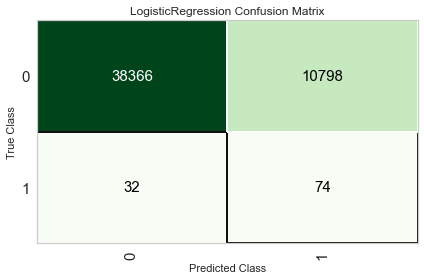

In [66]:
plot_model(best, 'confusion_matrix')

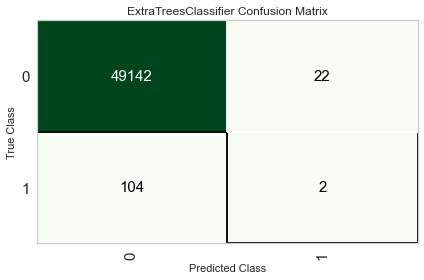

In [68]:
plot_model(x, 'confusion_matrix')

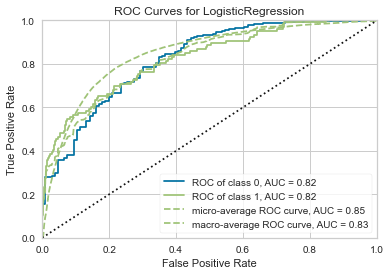

In [69]:
#plotar curva roc do modelo
plot_model(best, 'auc')

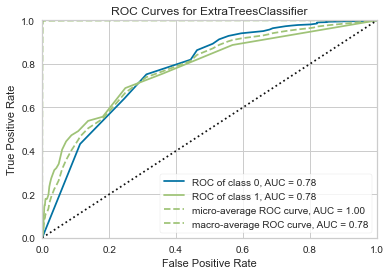

In [70]:
#plotar curva roc do modelo
plot_model(x, 'auc')

In [ ]:
evaluate_model(best)

In [71]:
evaluate_model(x)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#tunar o modelo
tuned_best = tune_model(best, optimize='AUC')
tuned_best

In [74]:
#tunar o modelo
tuned_best = tune_model(x, optimize='AUC')
tuned_best

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8708,0.8069,0.6800,0.0114,0.0224,0.0182,0.0764
1,0.8890,0.8285,0.4583,0.0086,0.0169,0.0129,0.0506
2,0.8767,0.7475,0.5417,0.0092,0.0180,0.0140,0.0582
3,0.8870,0.7818,0.5833,0.0107,0.0211,0.0171,0.0678
4,0.8795,0.7682,0.6000,0.0108,0.0212,0.0170,0.0686
5,0.8899,0.8177,0.6000,0.0118,0.0231,0.0190,0.0729
6,0.8856,0.7718,0.4800,0.0091,0.0179,0.0137,0.0537
7,0.9101,0.8052,0.4800,0.0116,0.0227,0.0185,0.0637
8,0.8981,0.7978,0.4800,0.0102,0.0201,0.0159,0.0584


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=5, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.002,
                     min_samples_leaf=3, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                     oob_score=False, random_state=5112, verbose=0,
                     warm_start=False)

In [47]:
type(x)

sklearn.ensemble._forest.ExtraTreesClassifier

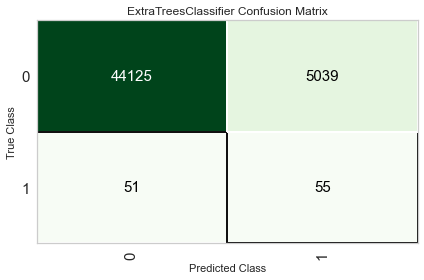

In [77]:
plot_model(tuned_best, 'confusion_matrix')

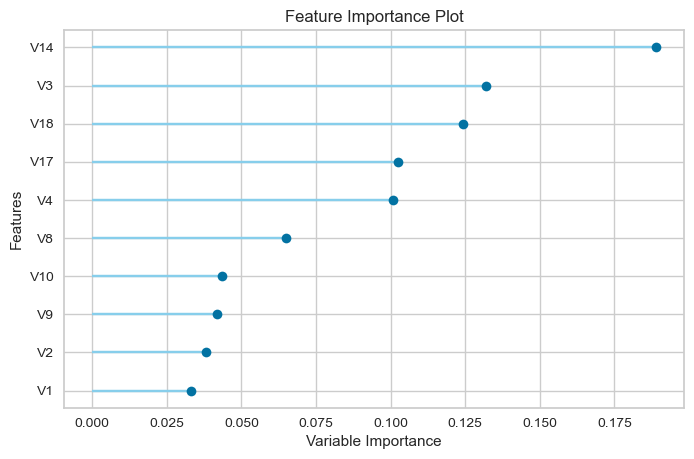

In [76]:
# feature importances
plot_model(tuned_best, plot='feature')

In [50]:
# predizer o modelo
predict_model(tuned_best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8966,0.7836,0.5377,0.0112,0.0219,0.0177,0.0662


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V15,V16,V17,V18,V19,V20,V21,Class,prediction_label,prediction_score
91087,91088,-0.590347,0.809683,0.312036,-0.188759,0.285559,-0.087988,0.319243,0.024251,-0.036172,...,0.419880,0.187357,-0.092934,-0.171929,-0.114762,0.149770,-0.192389,0,0,0.5836
120820,120821,-0.611025,0.305586,0.862939,0.505069,0.377367,-0.060478,0.031419,0.153240,-0.489649,...,-0.222463,-0.346363,0.095585,0.007372,0.481509,0.018577,-0.036964,0,0,0.5751
32457,32458,0.550392,0.125556,0.483003,1.312447,-0.195650,0.294300,-0.174246,0.117934,0.110700,...,-0.190690,0.194471,-0.048039,-0.220009,-0.288260,-0.091401,-0.123456,0,0,0.6245
68433,68434,-0.771577,0.762964,-0.275749,0.149930,-0.316946,-0.039887,-0.268886,0.689468,-0.042949,...,-0.081768,-0.358536,0.432636,-0.444424,0.353495,-0.221813,-0.043213,0,0,0.6249
145725,145726,0.973648,-0.246844,-0.042944,0.164428,-0.346751,0.071035,-0.549754,0.069968,1.339432,...,-0.241699,0.416459,0.019895,0.459770,-0.032243,-0.136454,-0.055542,0,0,0.5133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96828,96829,-0.737485,0.697362,0.427550,-0.038425,-0.207898,-0.448868,0.144923,0.325700,-0.215705,...,0.461821,-0.029064,-0.048847,-0.590889,-0.235773,-0.054465,-0.065912,0,0,0.6507
119962,119963,0.669686,-0.170395,0.391032,-0.165413,-0.497483,-0.067783,-0.397788,0.021795,-0.526863,...,0.197375,-0.278915,-0.399029,0.945635,-0.329428,-0.217285,-0.143621,0,0,0.6240
25916,25917,-1.025838,0.894240,0.283737,1.295438,-0.665275,0.280895,-0.585474,0.906138,-0.589040,...,-0.394398,0.187550,0.252459,0.316080,0.427303,-0.202045,0.039471,0,0,0.5221
34676,34677,0.575924,0.152859,-0.026914,0.519949,-0.018779,-0.433723,0.231338,-0.113024,-0.127494,...,0.026500,0.021284,-0.309652,0.141383,0.049737,-0.029717,0.036409,0,0,0.5930


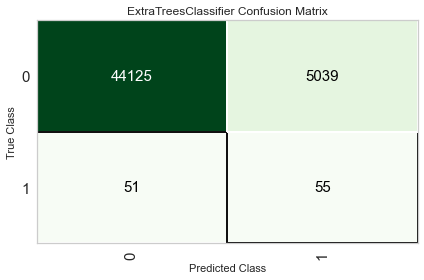

In [75]:
plot_model(tuned_best, 'confusion_matrix')

In [51]:
# finalizar o modelo
final_best = finalize_model(tuned_best)
print(final_best)

Pipeline(memory=FastMemory(location=C:\Users\Gracinha\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'V1', 'V2', 'V3', 'V4', 'V5',
                                             'V6', 'V7', 'V8', 'V9', 'V10',
                                             'V11', 'V12', 'V13', 'V14', 'V15',
                                             'V16', 'V17', 'V18', 'V19', 'V20',
                                             'V21'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missi...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight='balanced', criterion='gini',
   

In [ ]:
# fazendo previsões com conjunto de teste
teste_pred = predict_model(final_best, data=teste)
teste_pred

In [78]:
# fazendo previsões com conjunto de teste
teste_pred = predict_model(tuned_best, data=teste)
teste_pred

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V14,V15,V16,V17,V18,V19,V20,V21,prediction_label,prediction_score
0,1,1.037165,-0.064713,-0.568709,0.206423,-0.096319,-0.605072,0.055348,-0.131739,0.371072,...,0.251234,0.084659,0.032844,-0.153479,-0.161900,0.051674,-0.146485,-0.167351,0,0.5534
1,2,0.999413,-0.625445,-0.260484,-0.447269,-0.561264,-0.135433,-0.514645,0.025099,-0.054974,...,-0.072014,-0.019791,0.826528,-0.126800,-0.407177,0.358392,0.032858,0.027424,0,0.6718
2,3,0.045767,0.502259,-0.111723,-0.217624,0.333774,-0.494176,0.474073,-0.042395,-0.021013,...,-0.443233,-0.090445,0.115143,0.295289,-0.160795,-0.216980,-0.010688,-0.163363,0,0.6124
3,4,0.989824,-0.092475,-0.532103,0.060062,-0.107619,-0.324415,-0.043913,-0.017683,0.442919,...,0.277020,-0.412178,-0.263633,-0.047919,-0.156259,0.321330,-0.170045,-0.047757,0,0.5536
4,5,0.512949,-0.085913,0.601859,0.621950,-0.318286,0.549537,-0.469326,0.284619,0.346332,...,-0.040918,0.050274,-0.169468,0.045432,-0.211822,-0.365970,-0.101814,0.049579,0,0.5950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54893,54894,-0.284020,0.358543,0.816736,0.343417,0.321489,-0.557867,0.184523,-0.078538,-0.386856,...,-0.070294,0.697965,0.033622,0.116540,-0.045713,0.413006,0.097687,-0.049339,0,0.5979
54894,54895,0.612896,-0.242468,0.182951,-0.524729,-0.366483,-0.040439,-0.320372,0.113319,0.783348,...,0.263584,0.422738,0.079915,-0.323800,0.438058,0.239289,-0.067957,-0.038325,0,0.5640
54895,54896,-2.695072,1.641524,-1.549643,2.817192,-0.821163,-0.406851,-2.368896,-5.367777,-1.548769,...,-4.209872,0.414294,-3.293217,-5.369892,-2.386274,-0.034517,0.527214,-0.439787,1,0.9473
54896,54897,-3.359786,-4.447307,0.115764,0.135767,3.581458,-2.228217,-0.623468,0.277858,-0.677414,...,-0.128375,-0.192383,0.565939,-0.132920,-0.889939,-0.587518,1.527239,0.519082,0,0.5796


In [79]:
# salvando o modelo
save_model(final_best, "et_tuned")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Gracinha\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'V1', 'V2', 'V3', 'V4', 'V5',
                                              'V6', 'V7', 'V8', 'V9', 'V10',
                                              'V11', 'V12', 'V13', 'V14', 'V15',
                                              'V16', 'V17', 'V18', 'V19', 'V20',
                                              'V21'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missi...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced', criteri

In [ ]:
# salvar em picke